In [2]:
#Import Dependencies
import os
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt


#File to Load
happiness_data_to_load = "../Resources/Resources/World_Happiness_Report.csv"

#Read File
happiness_data = pd.read_csv(happiness_data_to_load)

#Display Data
display(happiness_data.head(10))
happiness_data.info()

,Country_Name,Regional_Indicator,Year,Life_Ladder,Log_GDP_Per_Capita,Social_Support,Healthy_Life_Expectancy_At_Birth,Freedom_To_Make_Life_Choices,Generosity,Perceptions_Of_Corruption,Positive_Affect,Negative_Affect,Confidence_In_National_Government
0,Afghanistan,South Asia,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686,0.414297,0.258195,0.612072
1,Afghanistan,South Asia,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035,0.481421,0.237092,0.611545
2,Afghanistan,South Asia,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766,0.516907,0.275324,0.299357
3,Afghanistan,South Asia,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109,0.479835,0.267175,0.307386
4,Afghanistan,South Asia,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,0.613513,0.267919,0.435440
5,Afghanistan,South Asia,2013,3.572100,7.680333,0.483552,52.000000,0.577955,0.062666,0.823204,0.547417,0.273328,0.482847
6,Afghanistan,South Asia,2014,3.130896,7.670638,0.525568,52.299999,0.508514,0.105755,0.871242,0.491641,0.374861,0.409048
7,Afghanistan,South Asia,2015,3.982855,7.653833,0.528597,52.599998,0.388928,0.081652,0.880638,0.491410,0.339276,0.260557
8,Afghanistan,South Asia,2016,4.220169,7.650370,0.559072,52.924999,0.522566,0.043916,0.793246,0.501409,0.348332,0.324990
9,Afghanistan,South Asia,2017,2.661718,7.647830,0.490880,53.250000,0.427011,-0.119410,0.954393,0.435270,0.371326,0.261179


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2199 entries, 0 to 2198
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Country_Name                       2199 non-null   object 
 1   Regional_Indicator                 2087 non-null   object 
 2   Year                               2199 non-null   int64  
 3   Life_Ladder                        2199 non-null   float64
 4   Log_GDP_Per_Capita                 2179 non-null   float64
 5   Social_Support                     2186 non-null   float64
 6   Healthy_Life_Expectancy_At_Birth   2145 non-null   float64
 7   Freedom_To_Make_Life_Choices       2166 non-null   float64
 8   Generosity                         2126 non-null   float64
 9   Perceptions_Of_Corruption          2083 non-null   float64
 10  Positive_Affect                    2175 non-null   float64
 11  Negative_Affect                    2183 non-null   float

In [3]:
#Dectect Missing Values
happiness_data.isna().sum()

Country_Name                           0
Regional_Indicator                   112
Year                                   0
Life_Ladder                            0
Log_GDP_Per_Capita                    20
Social_Support                        13
Healthy_Life_Expectancy_At_Birth      54
Freedom_To_Make_Life_Choices          33
Generosity                            73
Perceptions_Of_Corruption            116
Positive_Affect                       24
Negative_Affect                       16
Confidence_In_National_Government    361
dtype: int64

In [4]:
#Find Possible Duplicates
happiness_data.duplicated().value_counts()

False    2199
dtype: int64

-No Duplicates found

In [5]:
grouped = happiness_data.groupby("Country_Name")[["Life_Ladder", "Perceptions_Of_Corruption"]].mean()

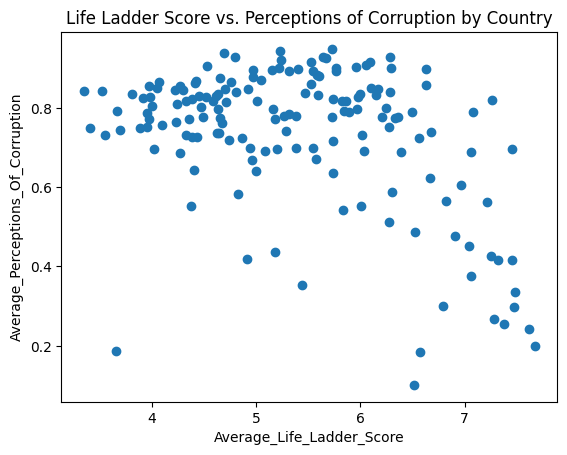

In [6]:
# Overall visualization of life ladder vs corruption
plt.scatter(grouped["Life_Ladder"], grouped["Perceptions_Of_Corruption"])
plt.xlabel("Average_Life_Ladder_Score")
plt.ylabel("Average_Perceptions_Of_Corruption")
plt.title("Life Ladder Score vs. Perceptions of Corruption by Country")
plt.show()

In [7]:
usa_df = happiness_data[happiness_data['Country_Name'] == "United States"]

In [8]:
life_ladder_table = usa_df[['Year', 'Life_Ladder']].set_index('Year').transpose()

In [9]:
corruption_table = usa_df[['Year', 'Perceptions_Of_Corruption']].set_index('Year').transpose()

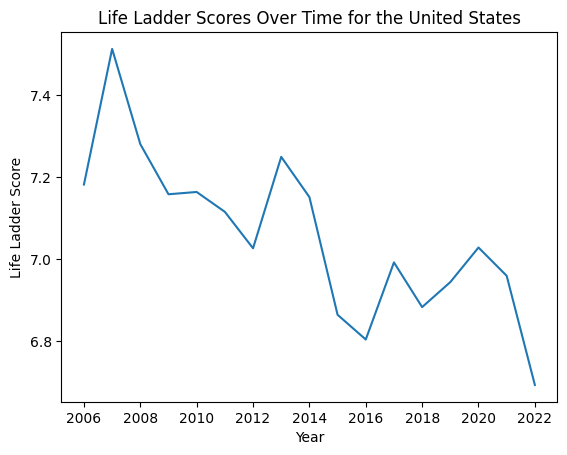

In [10]:
fig, ax = plt.subplots()
ax.plot(life_ladder_table.columns, life_ladder_table.values[0])
ax.set_xlabel('Year')
ax.set_ylabel('Life Ladder Score')
ax.set_title('Life Ladder Scores Over Time for the United States')

plt.show()

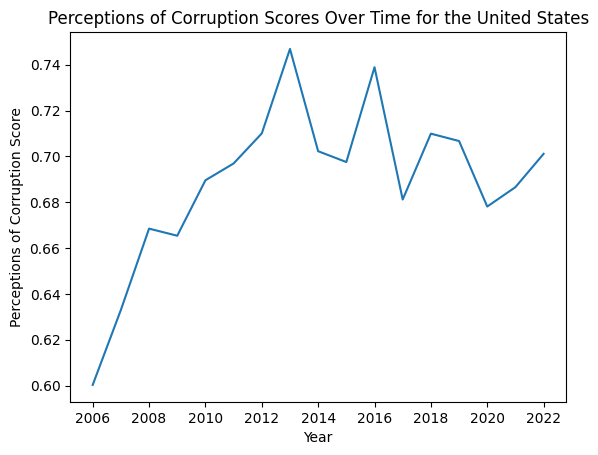

In [11]:
fig, ax = plt.subplots()
ax.plot(corruption_table.columns, corruption_table.values[0])
ax.set_xlabel('Year')
ax.set_ylabel('Perceptions of Corruption Score')
ax.set_title('Perceptions of Corruption Scores Over Time for the United States')

plt.show()

In [12]:
happiness_grouped = happiness_data.groupby("Country_Name")["Life_Ladder"].mean().reset_index()

In [13]:
sorted_happiness_grouped = happiness_grouped.sort_values("Life_Ladder", ascending=False)

Text(0.5, 1.0, 'Top 10 Happiest Countries')

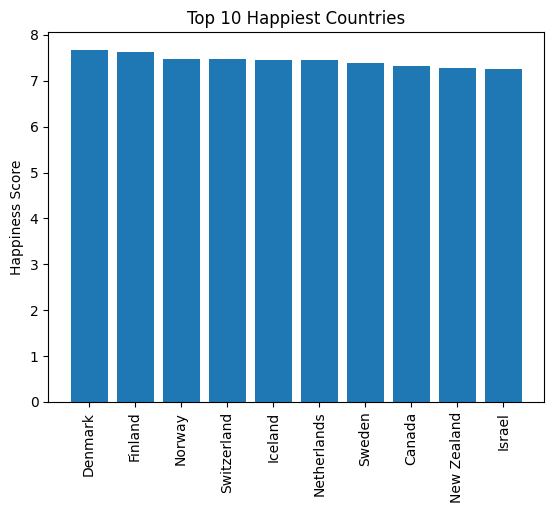

In [14]:
happiness_top_10 = sorted_happiness_grouped[:10]
plt.bar(happiness_top_10["Country_Name"], happiness_top_10["Life_Ladder"])
plt.xticks(rotation=90)
plt.ylabel("Happiness Score")
plt.title("Top 10 Happiest Countries")

In [16]:
life_expectancy_grouped = happiness_data.groupby("Country_Name")["Healthy_Life_Expectancy_At_Birth"].mean().reset_index()

In [19]:
sorted_life_expectancy_grouped = life_expectancy_grouped.sort_values("Healthy_Life_Expectancy_At_Birth", ascending=False)

Text(0.5, 1.0, 'Top 10 Countries by Life Expectancy')

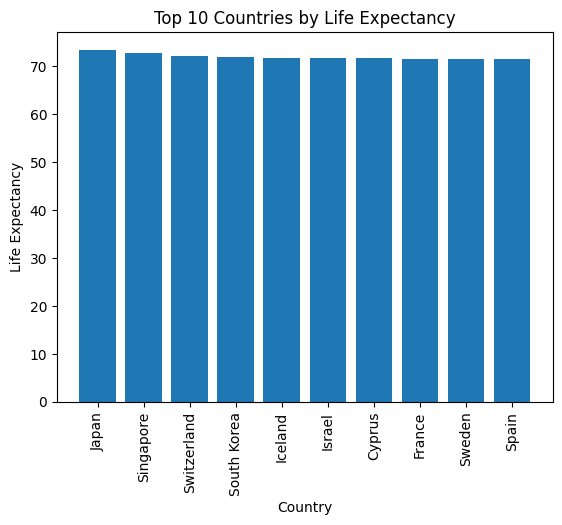

In [22]:
life_expectancy_top_10 = sorted_life_expectancy_grouped[:10]
plt.figure()
plt.bar(life_expectancy_top_10["Country_Name"], life_expectancy_top_10["Healthy_Life_Expectancy_At_Birth"])
plt.xticks(rotation=90)
plt.ylabel("Life Expectancy")
plt.xlabel("Country")
plt.title("Top 10 Countries by Life Expectancy")